# **Data Cleaning and Standardization**

In [2]:
import pandas as pd # data analysis and manipulation
import numpy as np # maths equations
import plotly.graph_objects as go # for 3D visualization
import plotly.express as px # for 3D visualization
import plotly.figure_factory as ff
from scipy.stats import norm, skew # for statistical analysis
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
df = pd.read_csv('/content/sample_data/kalimati-tarkari-prices-from-may-2021-to-september-2023.csv')

In [4]:
# Data exploration
print("Dataset shape: " , df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)
print("\nFirst Few Rows of the Dataset:")
print(df.head())
print("\nLast Few Rows of the Dataset: ")
print(df.tail())
print("\nSummary Statistics: ")
print(df.describe(include = 'all'))

Dataset shape:  (96479, 6)

Column Names and Data Types:
Tomato Big(Nepali)    object
1/5/2021              object
Kg                    object
50                    object
60                    object
55                    object
dtype: object

First Few Rows of the Dataset:
     Tomato Big(Nepali)  1/5/2021  Kg  50  60    55
0    Tomato Big(Indian)  1/5/2021  Kg  50  60    55
1   Tomato Small(Local)  1/5/2021  Kg  30  35  32.5
2  Tomato Small(Tunnel)  1/5/2021  Kg  30  35  32.5
3  Tomato Small(Indian)  1/5/2021  KG  40  45  42.5
4   Tomato Small(Terai)  1/5/2021  KG  40  45  42.5

Last Few Rows of the Dataset: 
         Tomato Big(Nepali)    1/5/2021  Kg        50        60        55
96474  Tomato Small(Indian)  2023-09-28  KG  Rs 45.00  Rs 55.00  Rs 50.00
96475   Tomato Small(Local)  2023-09-28  KG  Rs 50.00  Rs 60.00  Rs 55.00
96476  Tomato Small(Tunnel)  2023-09-28  KG  Rs 60.00  Rs 75.00  Rs 69.00
96477              Turnip A  2023-09-28  KG  Rs 70.00  Rs 80.00  Rs 75.00
96478    

In [5]:
# Providing names to columns
column_names = ['Vegetable','Date', 'Unit', 'Minimum Price' , 'Maximum Price', 'Average Price' ]
df = pd.read_csv('/content/sample_data/kalimati-tarkari-prices-from-may-2021-to-september-2023.csv', header = None, names = column_names, parse_dates=['Date'])

In [6]:
print(df.head())
print(df.tail())

              Vegetable      Date Unit Minimum Price Maximum Price  \
0    Tomato Big(Nepali)  1/5/2021   Kg            50            60   
1    Tomato Big(Indian)  1/5/2021   Kg            50            60   
2   Tomato Small(Local)  1/5/2021   Kg            30            35   
3  Tomato Small(Tunnel)  1/5/2021   Kg            30            35   
4  Tomato Small(Indian)  1/5/2021   KG            40            45   

  Average Price  
0            55  
1            55  
2          32.5  
3          32.5  
4          42.5  
                  Vegetable        Date Unit Minimum Price Maximum Price  \
96475  Tomato Small(Indian)  2023-09-28   KG      Rs 45.00      Rs 55.00   
96476   Tomato Small(Local)  2023-09-28   KG      Rs 50.00      Rs 60.00   
96477  Tomato Small(Tunnel)  2023-09-28   KG      Rs 60.00      Rs 75.00   
96478              Turnip A  2023-09-28   KG      Rs 70.00      Rs 80.00   
96479    Water Melon(Green)  2023-09-28   KG      Rs 50.00      Rs 60.00   

      Average 

In [7]:
# Parsing data to handle already correct date format YYYY-MM-DD
df['Parsed_Date'] = pd.to_datetime(df['Date'], errors='coerce')

# To handle unparsed data
mask_failed = df['Parsed_Date'].isna()

# Converts DD-MM-YYYY to YYYY-MM-DD
df.loc[mask_failed, 'Parsed_Date'] = pd.to_datetime(df.loc[mask_failed, 'Date'], errors='coerce', dayfirst=True)

# Formatting entire parsed datetime into 'YYYY-MM-DD' (datetime to String Object)
df['Date'] = df['Parsed_Date'].dt.strftime('%Y-%m-%d')

# Dropping helper column to avoid redundancy
df.drop(columns=['Parsed_Date'], inplace=True)

df.dtypes


,0
Vegetable,object
Date,object
Unit,object
Minimum Price,object
Maximum Price,object
Average Price,object


In [8]:
# Converting Price Columns into numerical values removing units
price_cols =  ['Minimum Price' , 'Maximum Price' , 'Average Price']

# Looping through each row in price_cols and removing 'Rs' along with unnecessary white spaces using strip()
# changing the data types into float from object
for col in price_cols:
  df[col] = df[col].astype(str) # ensuring the values are strings
  df[col] = df[col].str.replace('Rs','',regex = False).str.strip()
  df[col] = df[col].str.strip() # to remove whitespaces
  df[col] = pd.to_numeric(df[col], errors='coerce') # Converting cleaned strings into numeric (float) values

In [9]:
df.tail()

,Vegetable,Date,Unit,Minimum Price,Maximum Price,Average Price
96475,Tomato Small(Indian),2023-09-28,KG,45.0,55.0,50.00
96476,Tomato Small(Local),2023-09-28,KG,50.0,60.0,55.00
96477,Tomato Small(Tunnel),2023-09-28,KG,60.0,75.0,69.00
96478,Turnip A,2023-09-28,KG,70.0,80.0,75.00
96479,Water Melon(Green),2023-09-28,KG,50.0,60.0,56.67


In [10]:
df.head()

,Vegetable,Date,Unit,Minimum Price,Maximum Price,Average Price
0,Tomato Big(Nepali),2021-01-05,Kg,50.0,60.0,55.0
1,Tomato Big(Indian),2021-01-05,Kg,50.0,60.0,55.0
2,Tomato Small(Local),2021-01-05,Kg,30.0,35.0,32.5
3,Tomato Small(Tunnel),2021-01-05,Kg,30.0,35.0,32.5
4,Tomato Small(Indian),2021-01-05,KG,40.0,45.0,42.5


In [11]:
print(df.dtypes)

Vegetable         object
Date              object
Unit              object
Minimum Price    float64
Maximum Price    float64
Average Price    float64
dtype: object


In [42]:
# Logical Issue: Min > Max
invalid_logic = df[df['Minimum Price'] > df['Maximum Price']]
print(f"Rows with Minimum Price > Maximum Price: {len(invalid_logic)}")

# Outlier Detection using IQR
Q1 = df[['Minimum Price', 'Maximum Price', 'Average Price']].quantile(0.25)
Q3 = df[['Minimum Price', 'Maximum Price', 'Average Price']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['Minimum Price', 'Maximum Price', 'Average Price']] < (Q1 - 1.5 * IQR)) |
            (df[['Minimum Price', 'Maximum Price', 'Average Price']] > (Q3 + 1.5 * IQR)))

print("\nOutlier counts:")
print(outliers.sum())

Rows with Minimum Price > Maximum Price: 22

Outlier counts:
Minimum Price    5174
Maximum Price    4349
Average Price    5100
dtype: int64


In [12]:
print(df['Unit'].value_counts()) # to see the different units

Unit
KG           55421
Kg           38840
1 Pc          1104
Per Dozen      524
Doz            465
Per Piece      126
Name: count, dtype: int64


In [13]:
# Standardizing KG to Kg
df['Unit'] = df['Unit'].str.strip()

# Converting upper to lower case
df['Unit'] = df['Unit'].replace('KG','Kg')

In [14]:
print(df['Unit'].value_counts())

Unit
Kg           94261
1 Pc          1104
Per Dozen      524
Doz            465
Per Piece      126
Name: count, dtype: int64


In [15]:
df.head()

,Vegetable,Date,Unit,Minimum Price,Maximum Price,Average Price
0,Tomato Big(Nepali),2021-01-05,Kg,50.0,60.0,55.0
1,Tomato Big(Indian),2021-01-05,Kg,50.0,60.0,55.0
2,Tomato Small(Local),2021-01-05,Kg,30.0,35.0,32.5
3,Tomato Small(Tunnel),2021-01-05,Kg,30.0,35.0,32.5
4,Tomato Small(Indian),2021-01-05,Kg,40.0,45.0,42.5


In [17]:
# Saving the cleaned data as a csv file
# df.to_csv('kalimati_cleaned.csv', index=False, float_format='%.2f')

In [18]:
# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Price Range'] = df['Maximum Price'] - df['Minimum Price']

# Data Transformation and Reduction using Statistics


In [19]:
import pandas as pd

# Load the cleaned CSV file
df = pd.read_csv("/content/sample_data/kalimati_cleaned.csv")

# Counting the number of unique vegetables
unique_vegetables = df['Vegetable'].nunique()

# List them:
vegetable_list = df['Vegetable'].unique()

print("Number of unique vegetables:", unique_vegetables)
print("List of vegetables:", vegetable_list)

Number of unique vegetables: 133
List of vegetables: ['Tomato Big(Nepali)' 'Tomato Big(Indian)' 'Tomato Small(Local)'
 'Tomato Small(Tunnel)' 'Tomato Small(Indian)' 'Tomato Small(Terai)'
 'Potato Red' 'Potato Red(Indian)' 'Potato White' 'Onion Dry (Indian)'
 'Carrot(Local)' 'Carrot(Terai)' 'Cabbage(Local)' 'Cabbage(Terai)'
 'Cabbage' 'Cauli Local' 'Cauli Local(Jyapu)' 'Cauli Terai' 'Raddish Red'
 'Raddish White(Local)' 'Raddish White(Hybrid)' 'Brinjal Long'
 'Brinjal Round' 'Green Peas' 'French Bean(Local)' 'French Bean(Hybrid)'
 'Sword Bean' 'Bitter Gourd' 'Bottle Gourd' 'Pumpkin' 'Squash(Long)'
 'Squash(Round)' 'Turnip' 'Okara' 'Sweet Potato' 'Barela' 'Arum'
 'Christophine' 'Brd Leaf Mustard' 'Spinach Leaf' 'Cress Leaf'
 'Mustard Leaf' 'Fenugreek Leaf' 'Onion Green' 'Bakula' 'Yam'
 'Mushroom(Kanya)' 'Mushroom(Button)' 'Brocauli' 'Sugarbeet'
 'Red Cabbbage' 'Lettuce' 'Knolkhol' 'Celery' 'Parseley' 'Fennel Leaf'
 'Mint' 'Turnip A' 'Tamarind' 'Bamboo Shoot' 'Tofu' 'Gundruk'
 'Apple(Jhol

In [20]:
# To calculate the most frequently bought vegetables
top_veg = df['Vegetable'].value_counts().head(10).index
print(top_veg)

print(df['Vegetable'].value_counts().head(10))

Index(['Cauli Local', 'Coriander Green', 'Fish Fresh(Bachuwa)',
       'Fish Fresh(Rahu)', 'Chilli Dry', 'Ginger', 'Fish Fresh(Mungari)',
       'Tofu', 'Garlic Dry Chinese', 'French Bean(Local)'],
      dtype='object', name='Vegetable')
Vegetable
Cauli Local            991
Coriander Green        991
Fish Fresh(Bachuwa)    991
Fish Fresh(Rahu)       991
Chilli Dry             990
Ginger                 990
Fish Fresh(Mungari)    990
Tofu                   990
Garlic Dry Chinese     990
French Bean(Local)     990
Name: count, dtype: int64


### Average price Trend of 10 Most bought Vegetables

In [21]:
# Now we can calculate the average price of those vegetable over the years

top_df = df[df['Vegetable'].isin(top_veg)]

avg_price_trend = top_df.groupby(['Vegetable', 'Date'])['Average Price'].mean().reset_index()

print(avg_price_trend)


        Vegetable       Date  Average Price
0     Cauli Local   1/1/2022          45.00
1     Cauli Local   1/1/2023          35.00
2     Cauli Local  1/10/2021          22.50
3     Cauli Local  1/10/2022          30.00
4     Cauli Local  1/10/2023          45.00
...           ...        ...            ...
9899         Tofu   9/8/2022         105.00
9900         Tofu   9/8/2023         116.67
9901         Tofu   9/9/2021          95.00
9902         Tofu   9/9/2022         105.00
9903         Tofu   9/9/2023         116.67

[9904 rows x 3 columns]


### Price Range of Vegetables to Identify Market Stability

In [22]:
price_range = df.groupby('Vegetable').agg({
    'Minimum Price': 'min',
    'Maximum Price': 'max'
})

price_range['Price Range'] = price_range['Maximum Price'] - price_range['Minimum Price']

price_range = price_range.sort_values(by='Price Range', ascending=False).reset_index()

print(price_range)

               Vegetable  Minimum Price  Maximum Price  Price Range
0              Asparagus            0.0         3000.0       3000.0
1                   Mint           80.0         1000.0        920.0
2                Lettuce           30.0          900.0        870.0
3               Parseley          100.0          900.0        800.0
4                   Kiwi          150.0          900.0        750.0
..                   ...            ...            ...          ...
128              Cabbage           10.0           60.0         50.0
129                Lemon           40.0           90.0         50.0
130              Pumpkin           15.0           60.0         45.0
131   Potato Red(Indian)           16.0           55.0         39.0
132  Onion Dry (Chinese)           35.0           65.0         30.0

[133 rows x 4 columns]


### Application of Standard Deviation to Identify Stable Vegetables for Targetting Predictable Profits

In [23]:
std_cv = df.groupby('Vegetable')['Average Price'].agg(['mean', 'std']).reset_index()
std_cv['CV'] = std_cv['std'] / std_cv['mean']
std_cv = std_cv.sort_values('CV', ascending=True)


### Year-on-Year Price Change (%) to identify High-Growth Vegetabes by price change

In [24]:
# Creating a year column for simplicity
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Average price per vegetable per year
avg_price_year = df.groupby(['Vegetable', 'Year'])['Average Price'].mean().reset_index()

# Calculating % change
avg_price_year['YoY Change (%)'] = avg_price_year.groupby('Vegetable')['Average Price'].pct_change() * 100


### Ranking Vegetables by Average Price to classify them (Premium or Budget)

In [25]:
price_rank = df.groupby('Vegetable')['Average Price'].mean().reset_index()
price_rank['Rank'] = price_rank['Average Price'].rank(method='dense', ascending=False)
price_rank = price_rank.sort_values('Rank')


# Visualization using Exploratory Data Analysis

## Barplot for the 10 most Frequently bought Vegetables

In [26]:
top_vegetables = df['Vegetable'].value_counts().nlargest(10).reset_index()
top_vegetables.columns = ['Vegetable', 'Frequency']

fig = px.bar(
    top_vegetables,
    x='Frequency',
    y='Vegetable',
    orientation='h',
    title='Top 10 Most Frequent Vegetables',
    color='Frequency',
    color_continuous_scale='Viridis'
)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

## Time-Series plot, Heatmap and Correlation Matrix for Average Price Trend

In [27]:
top_veg = df['Vegetable'].value_counts().head(10).index
filtered_df = df[df['Vegetable'].isin(top_veg)]

# Creating a pivot table: Vegetables as rows, Date as columns
pivot_table = filtered_df.pivot_table(index='Vegetable', columns='Date', values='Average Price', aggfunc='mean')

# Resetting index to make 'Vegetable' a column again
pivot_table_reset = pivot_table.reset_index()

# Melting the table into long format
melted_df = pivot_table_reset.melt(id_vars='Vegetable', var_name='Date', value_name='Average Price')


In [28]:
avg_price_time = df.groupby('Date')['Average Price'].mean().reset_index()

fig = px.line(
    avg_price_time,
    x='Date',
    y='Average Price',
    title='Average Price Trend Over Time'
)
fig.update_traces(mode="lines+markers")
fig.show()


In [29]:
# Get top 10 most frequent vegetables
top_veg = df['Vegetable'].value_counts().nlargest(10).index
df_top = df[df['Vegetable'].isin(top_veg)].copy()

# Extract month in 'YYYY-MM' format
df_top['Month'] = pd.to_datetime(df_top['Date'], errors='coerce').dt.to_period('M').astype(str)

# Pivot table for average price
pivot_df = df_top.pivot_table(index='Vegetable', columns='Month', values='Average Price', aggfunc='mean')

# Convert to long format and drop missing values
heatmap_long = pivot_df.reset_index().melt(id_vars='Vegetable', var_name='Month', value_name='Avg_Price').dropna()

# Plotly Heatmap
import plotly.express as px
fig = px.density_heatmap(
    heatmap_long,
    x='Month',
    y='Vegetable',
    z='Avg_Price',
    color_continuous_scale='YlGnBu',
    title='Monthly Average Prices of Top 10 Vegetables'
)
fig.update_layout(
    xaxis_nticks=24,
    xaxis_title='Month',
    yaxis_title='Vegetable',
    height=700
)
fig.show()

In [30]:
df['Price Range'] = df['Maximum Price'] - df['Minimum Price']
corr_df = df[['Minimum Price', 'Maximum Price', 'Average Price', 'Price Range']].corr()
z_rounded = np.round(corr_df.values, 2)

# Custom color scale
colors = [[0.0, 'red'], [0.5, 'white'], [1.0, 'blue']]

fig = ff.create_annotated_heatmap(
    z=corr_df.values,
    x=list(corr_df.columns),
    y=list(corr_df.index),
    annotation_text=z_rounded,
    colorscale=colors,
    showscale=True,

)
fig.update_layout(title_text='Correlation Matrix of Price Features')
fig.show()


## Histogram Analysis and Barplot of Price Range of Vegetables

<Axes: xlabel='Average Price', ylabel='Count'>

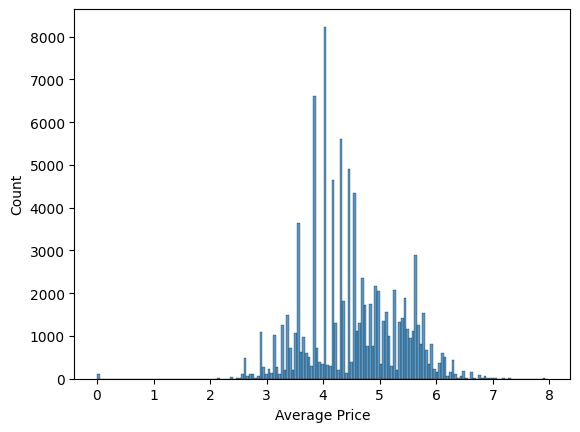

In [31]:
fig = px.histogram(price_range, x='Price Range', nbins=30,
                   title='Distribution of Price Ranges Across Vegetables and Fruits')
fig.update_layout(xaxis_title='Price Range (Max - Min)', yaxis_title='Count of Vegetables')
fig.show()
sns.histplot(np.log1p(df['Average Price']))


In [32]:
fig = px.bar(price_range.head(10), x='Vegetable', y='Price Range',
             title='Distribution of Top 10 Vegetables and Fruits by Price',
             labels={'Price Range': 'Price Range (NPR)'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Box Plot and Barplot of Stable Vegetables and Fruits for Profit Prediction

In [33]:
fig = px.box(std_cv.sort_values('CV').head(10),
             x='Vegetable', y='CV', points="all",
             title='Box Plot of Coefficient of Variation (Top 10 Stable Vegetables and Fruits)')

fig.update_layout(yaxis_title='CV (Std / Mean)', xaxis_tickangle=-45)
fig.show()


In [34]:
fig = px.bar(std_cv.head(10), x='Vegetable', y='CV',
             title='Top 10 Most Stable Vegetables and Fruits',
             labels={'CV': 'Coefficient of Variation'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Histogram Analysis and Barplot of Year-on-Year Price Change (%)

In [35]:
# Filtering out extreme YoY values
hist_df = avg_price_year.dropna()
hist_df = hist_df[(hist_df['YoY Change (%)'] > -100) & (hist_df['YoY Change (%)'] < 200)]

# Plotting
fig = px.histogram(hist_df, x='YoY Change (%)', nbins=50,
                   title='Distribution of Year-on-Year Price Change (%)')
fig.update_layout(xaxis_title='YoY Change (%)', yaxis_title='Frequency')
fig.show()



In [36]:
# Including vegetables that only exist in both 2021 and 2022
valid_veg = avg_price_year.groupby('Vegetable')['Year'].nunique()
valid_veg = valid_veg[valid_veg > 1].index
yoy_filtered = avg_price_year[avg_price_year['Vegetable'].isin(valid_veg)]

# Focusing on 2022
yoy_2022 = yoy_filtered[yoy_filtered['Year'] == 2022]
yoy_2022 = yoy_2022[(yoy_2022['YoY Change (%)'] > -100) & (yoy_2022['YoY Change (%)'] < 200)]
yoy_2022 = yoy_2022.sort_values('YoY Change (%)', ascending=False)

fig = px.bar(yoy_2022.head(10), x='Vegetable', y='YoY Change (%)',
             title='Top 10 Vegetables by Year-on-Year Price Increase (2022)',
             labels={'YoY Change (%)': 'Change %'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Box Plot and Barplot of Price Ranking (Average Price)

In [37]:
# This shows the plot of 10 most frequently bought vegetables
fig = px.box(filtered_df,
             x='Vegetable',
             y='Average Price',
             points='all',  # Show all data points
             title='Price Distribution of Top 10 Frequent Vegetables')

fig.update_layout(
    xaxis_title='Vegetable',
    yaxis_title='Average Price (NPR)',
    xaxis_tickangle=45,
    height=600
)

fig.show()


In [ ]:
fig = px.bar(price_rank.head(10), x='Vegetable', y='Average Price',
             title='Top 10 Most Expensive Vegetables by Average Price',
             labels={'Average Price': 'Avg Price (NPR)'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()